## Use-case: One of the HR company has hired you as a ML engineer. Your task is to create a model that can predict the salary of the employee based on his/her years of experience in the industry. To support the same, following info has been provided:

1. Data with relevant columns
2. Data with no missing data
3. Data confirming the linear relationship between YearsExperience and Salary
4. For testing go with 20% random samples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Salary_Data.csv')

In [3]:
data.info()
#No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
YearsExperience    31 non-null float64
Salary             31 non-null float64
dtypes: float64(2)
memory usage: 576.0 bytes


In [4]:
#Glimpse of my dataset
data.head()
#Data Types as per ML and Python
# YearsExperience ---> Numerical ----> Float
# Salary -----------> Numerical -----> Float

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# Identify the type of the Algo to proceed
# AS per the above, I can see the label is of Numeric Type, therefore I will go for Regression-based Algo
# From info() we figured out, there doesnot exists any missing data in label or feature
# Since all the columns are Numeric, therefore no Categorical Data Handling is required

In [6]:
#Check for Outliers
data.describe()

,YearsExperience,Salary
count,31.000000,3.100000e+01
mean,8.367742,3.584299e+09
std,17.233599,1.995611e+10
min,1.100000,3.773100e+04
25%,3.200000,5.679950e+04
50%,4.900000,6.602900e+04
75%,8.050000,1.034420e+05
max,100.000000,1.111110e+11


In [7]:
# max ---> 25% , 50% and 75 %
# Default Threshold value for acceptance of the data to create model is +-10%
onequartile = data.YearsExperience.max() * 0.25
twoquartile = data.YearsExperience.max() * 0.50
thirdquartile = data.YearsExperience.max() * 0.75
print(onequartile)
print(twoquartile)
print(thirdquartile)

25.0
50.0
75.0


(array([30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.1 ,  10.99,  20.88,  30.77,  40.66,  50.55,  60.44,  70.33,
         80.22,  90.11, 100.  ]),
 <a list of 10 Patch objects>)

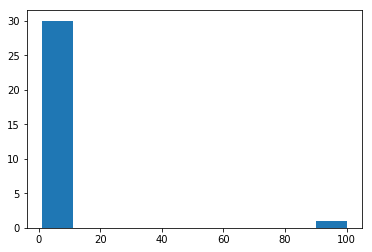

In [8]:
plt.hist(data.YearsExperience)

In [9]:
data[data.YearsExperience >= 20].index[0]

30

In [10]:
newData = data.drop(data[data.YearsExperience >= 20].index[0], axis = 0 )
#data[data.YearsExperience >= 20].index[0]
newData.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
# Hence, my data is prepared for further processing
# newData as our input data

In [12]:
# Seperate your data with features and label
features = newData.iloc[:,[0]].values #sklearn expect your data to be in form of np arrray. values 
label = newData.iloc[:,[1]].values # convert series/df into np array

In [13]:
features.shape

(30, 1)

In [14]:
label.shape

(30, 1)

In [15]:
# For Regression use-case, always ensure your feature and label is a 2D array ! All the data must be in the form of vector !
# Create your train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = 3)

In [16]:
#Create your regression model using Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)  #Equation gets created , slope and intercept is calculated based on supplied data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
model.intercept_

array([26197.76702738])

In [18]:
model.coef_

array([[9418.56697369]])

In [19]:
#Equation is 
# y = 9332.94473799 * x + 25609.89799835

In [20]:
#Lets check whether the model is an acceptable model or not!
#Accuracy Score of the model
print(model.score(X_train,y_train)) #Training accuracy
print(model.score(X_test,y_test)) #Testing accuracy

0.9545249190394052
0.9695039421049821


In [21]:
# My technique is 
# if my testing score > training score ====> Model is generalized and accepatable model subject to accuracy percentage
# if my training score > testing score ===> Model is a memorized model resulting less generalization . So not acceptable

# My model technically memorized the data ..... The model is not been created as per generalization rules. Therefore the model
# is rejected

In [22]:
#Check the scale of the data
newData.describe()
#I check the min and max for each column available. If this is within the scale, its a good data for model.

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [23]:
#Feature Scaling 
# Cant apply feature scaling since we have a scaled data. Because I have only one feature

In [24]:
#Code to get the predictions

In [25]:
model.predict(X_test)

array([[ 72348.74519846],
       [ 53511.61125108],
       [100604.44611953],
       [115674.15327744],
       [ 81767.31217215],
       [ 68581.31840899]])

In [26]:
years = np.array([[16]])
years.shape
model.predict(years)

array([[176894.83860642]])

In [27]:
#pd.DataFrame([years,model.predict(years)]).to_excel('ExcelData.xlsx','Book1')

In [28]:
#Deploy ----> You need to do something such that your model (memory object ) must be converted into 
# a file. To do that, we use Pickle 

In [29]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
import pickle
# pickle.dump()  to dump the memory object into a file
# pickle.dump(modelvariable , file)
# In python , to create a file and write data in the form of bytes 
# open(filename,'wb') write in the form of bytes
pickle.dump(model,open('HRSalaryPredictor.model','wb'))

In [31]:
# How the model is loaded
finalmodel = pickle.load(open('HRSalaryPredictor.model','rb'))
finalmodel.predict(np.array([[2.9]]))

array([[53511.61125108]])